# <p style="background-color:#FF0000;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> "  Data Analysis Project's  " </p>

In [121]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [40]:
iris=pd.read_csv('Desktop/Iris.csv')

In [41]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# <p style="background-color:#FF1493;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> "  Data Exploration  " </p>

In [42]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [43]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [103]:
iris['Id'].mean()

75.5

In [104]:
iris['Id'].median()

75.5

In [20]:
df['age'].var()

1.6282850350189455

In [105]:
iris['Id'].std()

43.445367992456916

In [106]:
iris['Id'].mode()

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [107]:
IQR = iris['Id'].quantile(0.75) - iris['Id'].quantile(0.25)
IQR

74.5

In [108]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


# <p style="background-color:#FF00FF;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> "  Sorting  " </p>

In [109]:
iris.sort_values(by="Id", ascending=False).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
149,150,5.9,3.0,5.1,1.8,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica


In [110]:
iris.sort_values(by="SepalLengthCm", ascending=False).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


In [111]:
iris.sort_values(by="Species", ascending=False).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
149,150,5.9,3.0,5.1,1.8,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
121,122,5.6,2.8,4.9,2.0,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica


In [112]:
iris.sort_values(by="PetalWidthCm", ascending=False).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica


In [115]:
iris[(iris["Id"] == 0) & (iris["Species"] == "No")]["Species"].max()

nan

# <p style="background-color:#EE82EE;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> "  Data Visualization  " </p>

<AxesSubplot:title={'center':'number of medals over the SepalLengthCm'}>

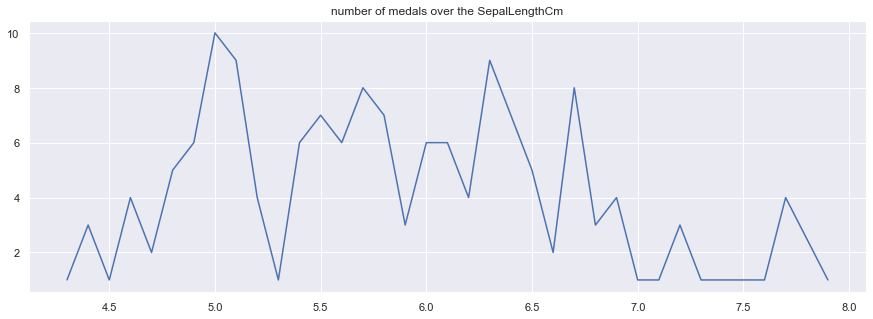

In [117]:
plt.figure(figsize=(15,5))
plt.title('number of medals over the SepalLengthCm')
iris.SepalLengthCm.value_counts().sort_index().plot()

<AxesSubplot:title={'center':'number of medals over the PetalLengthCm'}>

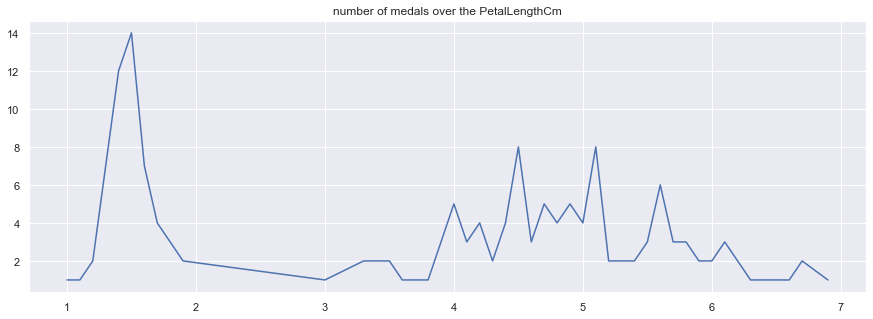

In [118]:
plt.figure(figsize=(15,5))
plt.title('number of medals over the PetalLengthCm')
iris.PetalLengthCm.value_counts().sort_index().plot()

<AxesSubplot:title={'center':'number of medals over the Id'}>

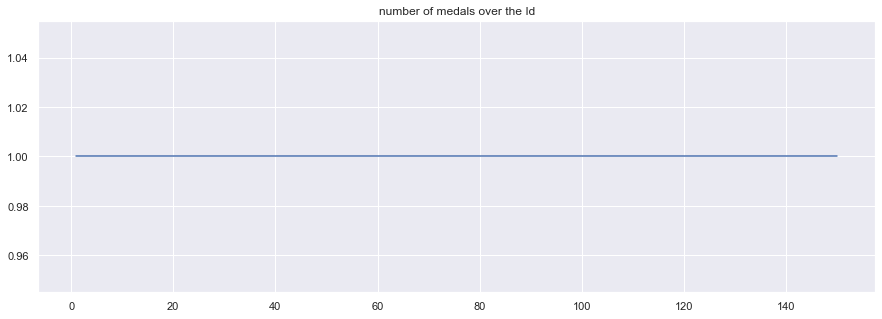

In [119]:
plt.figure(figsize=(15,5))
plt.title('number of medals over the Id')
iris.Id.value_counts().sort_index().plot()

In [125]:
ethnicity = iris['Species'].value_counts()
fig = px.pie(values = ethnicity.values,
             names = ethnicity.index,
             color_discrete_sequence = px.colors.sequential.Sunset,
             title = "Species distribution",
             hole = 0.8)
 
fig.update_traces(textinfo = 'label+percent', textfont_size=18)

fig.update_layout(
    font = dict(size = 20, family = "arial"),
    annotations = [dict(text = 'Species', x = 0.5, y = 0.5, font_size = 30, showarrow=False)]
)
fig.show()

<a id="1.2"></a>
# Scatter PLots with Variable-sized circular markers

In [47]:
fig = px.scatter(data_frame = iris, 
                 x="SepalWidthCm", 
                 y="SepalLengthCm", 
                 color="Species",
                 size='PetalLengthCm', 
                 hover_data=['PetalWidthCm'])

fig.show()

<a id="1.3"></a>
# Continous Color Scatter Plots

In [49]:
fig = px.scatter(data_frame = iris, 
                 x="SepalWidthCm", 
                 y="SepalLengthCm", 
                 size = "PetalLengthCm",
                 color='PetalLengthCm')
                
fig.show()

<a id="1.4"></a>
# Scatter Plot with markers(symbols)

# Different marker styles available here - https://plotly.com/python/marker-style/

In [50]:
fig = px.scatter(data_frame=iris, 
                 x="SepalWidthCm", 
                 y="SepalLengthCm", 
                 color="Species",
                 #size = "PetalLengthCm",
                 symbol = "Species"
                 )
fig.show()

<a id="1.5"></a>
# Marginal Distribution Scatter Plots

In [51]:
fig = px.scatter(data_frame = iris, 
                 x="SepalLengthCm", 
                 y="SepalWidthCm", 
                 size = "PetalLengthCm",
                 marginal_x="histogram", 
                 marginal_y="box",
                )
fig.show()

In [63]:
fig = px.scatter(data_frame = iris, 
                 x="SepalLengthCm", 
                 y="SepalWidthCm", 
                 size = "PetalLengthCm",
                 color = "Species",
                 marginal_x="histogram", 
                 marginal_y="box",
                )
fig.show()

<a id="3.1"></a>
# Basic Pie Plot

In [67]:
fig = px.pie(data_frame = iris, 
             values='SepalWidthCm', 
             names='SepalLengthCm')
fig.show()

<a id="4.5"></a>
# Stacked Bar Plot

In [72]:
x= [1,3,5,7,9,11,13] 
y1 = [21,11,17,32]
y2= [17,18,29,40]

fig = go.Figure(data=[
    go.Bar(x=x, y=y1),
    go.Bar(x=x, y=y2)
])
fig.update_layout(barmode='stack')
fig.show()

<a id="4.6"></a>
#  Grouped Bar Plot

In [73]:
x= [1,3,5,7,9,11,13] 
y1 = [21,11,17,32]
y2= [17,18,29,40]

fig = go.Figure(data=[
    go.Bar(x=x, y=y1),
    go.Bar(x=x, y=y2)
])
fig.update_layout(barmode='group')
fig.show()

# Basic Box Plot -1 

In [127]:
fig = px.box(iris, y="SepalWidthCm" )
fig.show()

In [76]:
fig = px.box(iris, y="SepalLengthCm" )
fig.show()

In [80]:
fig = px.box(iris, y="Id" )
fig.show()

# Basic Box Plot - 2 

In [82]:
fig = px.box(iris, 
             x= "Species", 
             y="SepalLengthCm" )
fig.show()

<a id="5.2"></a>
#  Horizontal Bar Plot

In [84]:
fig = px.box(iris, 
             x="SepalLengthCm" )
fig.show()

<a id="5.3.a"></a>
# Box Plots with all points

In [88]:
fig = px.box(iris, 
             x="Species", 
             y="SepalWidthCm", 
             points="all")
fig.show()

<a id="5.3.b"></a>
# Box Plots with outlier points

In [91]:
fig = px.box(iris, 
             x="PetalWidthCm", 
             y="SepalLengthCm", 
             points="outliers")
fig.show()

<a id="5.3.c"></a>
# Box Plots with only points

In [93]:
fig = px.strip(iris,
               x='Id', 
               y='SepalLengthCm')
fig.show()

<a id="5.6"></a>
#  Rainbow Bar Plot

In [102]:
N = 30
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

fig = go.Figure(
    data=[go.Box(y=3.5 * np.sin(np.pi * i/N) + i/N + (1.5 + 0.5 * np.cos(np.pi*i/N)) * np.random.rand(10),marker_color=c[i]) for i in range(int(N))])

fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(255,255,255)',
)

fig.show()

# <p style="background-color:#FFB6C1;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> "  الحمدلله رب العالميين  " </p>

# <p style="background-color:#FF0000;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> ! Thank You ! </p>